# GLIMS
## Fetch les données brutes
### Une fois téléchargées, elles seront dans /projet_glacier/data/raw/...

In [1]:
from glacier.data import fetch_data, unzip_to
paths = fetch_data("20260114")

#### Dézippe les fichiers téléchargers


In [2]:
paths = fetch_data("20260114")
extracted_root = paths[0].parent / "extracted"
extracted_dirs = unzip_to(paths, extracted_root)

## Exploration du jeu de donnée brute

In [3]:
from pathlib import Path
from glacier.data.data_fetching import repo_root
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
root = repo_root()
base = root / "data" / "raw" / "glims_v1" / "extracted"

north = next(p for p in base.rglob("glims_polygons.shp") if "_north_" in str(p).lower())
south = next(p for p in base.rglob("glims_polygons.shp") if "_south_" in str(p).lower())

gdf_raw_north = gpd.read_file(north)
gdf_raw_south = gpd.read_file(south)
gdf_raw = pd.concat([gdf_raw_north, gdf_raw_south])
len(gdf_raw), gdf_raw.crs #.crs est pour vérifier le système de coordonnéees 

C:\Users\Pierre Emery\Documents\Projets\ift3710\projet_glacier\.venv\Lib\site-packages\pyogrio\raw.py:200: RuntimeWarning: C:\Users\Pierre Emery\Documents\Projets\ift3710\projet_glacier\data\raw\glims_v1\extracted\NSIDC-0272_glims_db_north_20260114_v01.0\glims_download_73053\glims_polygons.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(
C:\Users\Pierre Emery\Documents\Projets\ift3710\projet_glacier\.venv\Lib\site-packages\pyogrio\raw.py:200: RuntimeWarning: C:\Users\Pierre Emery\Documents\Projets\ift3710\projet_glacier\data\raw\glims_v1\extracted\NSIDC-0272_glims_db_south_20260114_v01.0\glims_download_05601\glims_polygons.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


(785920,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [5]:
gdf_raw.columns
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
gdf_raw.head(5)

,line_type,anlys_id,glac_id,anlys_time,area,db_area,width,length,primeclass,min_elev,mean_elev,max_elev,src_date,rec_status,glac_name,wgms_id,local_id,glac_stat,gone_date,gone_dt_e,subm_id,release_dt,proc_desc,rc_id,geog_area,chief_affl,conn_lvl,surge_type,term_type,gtng_o1reg,gtng_o2reg,rgi_gl_typ,parent_id,submitters,analysts,geometry
0,glac_bound,715234.0,G340953E63564N,1993-09-01T00:00:00,12.414,12.413600,0.0,0.0,0.0,405.0,0.0,1440.0,1999-09-09T00:00:00,okay,None,None,None,exists,None,0.0,719.0,2014-12-01T11:00:00,Manual glacier digitization from ASTER imagery...,761.0,Randolph Glacier Inventory; Umbrella RC for me...,University of Colorado,0.0,0.0,9.0,6.0,1.0,None,G340925E63656N,"Sigurdsson, Oddur","Sigurdsson, Oddur","POLYGON ((-19.04472 63.58378, -19.04474 63.583..."
1,glac_bound,1048878.0,G306386E70153N,2020-09-09T00:00:00,0.000,14.933000,0.0,0.0,0.0,0.0,0.0,0.0,1900-09-09T00:00:00,okay,None,None,None,exists,None,0.0,830.0,2020-08-25T09:00:00,Mapping of Little Ice Age morraines; Mapped mo...,586.0,Greenland,University of Leeds,0.0,0.0,0.0,5.0,1.0,None,None,"Carrivick, Jonathan L.","Carrivick, Jonathan L.","POLYGON ((-53.67435 70.18178, -53.66553 70.180..."
2,glac_bound,409177.0,G222822E58665N,2015-07-16T00:00:00,0.777,0.776922,0.0,0.0,0.0,2496.0,0.0,3879.0,2010-09-15T00:00:00,okay,None,None,None,exists,None,0.0,624.0,2015-07-16T00:00:00,Semi-automated glacier classification.; From R...,761.0,Randolph Glacier Inventory; Umbrella RC for me...,University of Colorado,0.0,1.0,9.0,1.0,6.0,19,G222793E58546N,"Cogley, Graham","Beedle, Matthew; Berthier, Etienne; Bolch, Tob...","POLYGON ((-137.17153 58.66963, -137.17016 58.6..."
3,glac_bound,405377.0,G217968E60885N,2015-07-16T00:00:00,8.838,8.837740,0.0,0.0,0.0,1560.0,0.0,2410.0,2010-09-12T00:00:00,okay,None,None,None,exists,None,0.0,624.0,2015-07-16T00:00:00,Semi-automated glacier classification.; From R...,761.0,Randolph Glacier Inventory; Umbrella RC for me...,University of Colorado,0.0,0.0,9.0,1.0,5.0,99,None,"Cogley, Graham","Beedle, Matthew; Berthier, Etienne; Bolch, Tob...","POLYGON ((-141.99826 60.87683, -141.99836 60.8..."
4,glac_bound,401811.0,G214518E60704N,2015-07-16T00:00:00,0.258,0.258463,0.0,0.0,0.0,600.0,0.0,1147.0,2010-09-02T00:00:00,okay,None,None,None,exists,None,0.0,624.0,2015-07-16T00:00:00,Semi-automated glacier classification.; From R...,761.0,Randolph Glacier Inventory; Umbrella RC for me...,University of Colorado,0.0,0.0,9.0,1.0,4.0,99,None,"Cogley, Graham","Beedle, Matthew; Berthier, Etienne; Bolch, Tob...","POLYGON ((-145.47844 60.70451, -145.47778 60.7..."


In [6]:
gdf_raw.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 785920 entries, 0 to 169128
Data columns (total 36 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   line_type   785920 non-null  str     
 1   anlys_id    785920 non-null  float64 
 2   glac_id     785920 non-null  str     
 3   anlys_time  785920 non-null  str     
 4   area        785920 non-null  float64 
 5   db_area     785920 non-null  float64 
 6   width       785920 non-null  float64 
 7   length      785920 non-null  float64 
 8   primeclass  785920 non-null  float64 
 9   min_elev    785920 non-null  float64 
 10  mean_elev   785920 non-null  float64 
 11  max_elev    785920 non-null  float64 
 12  src_date    785920 non-null  str     
 13  rec_status  785920 non-null  str     
 14  glac_name   785812 non-null  str     
 15  wgms_id     785920 non-null  str     
 16  local_id    785906 non-null  str     
 17  glac_stat   785920 non-null  str     
 18  gone_date   785920 no

In [7]:
gdf_raw[["min_elev","mean_elev","max_elev"]].describe()

,min_elev,mean_elev,max_elev
count,785920.000000,785920.000000,785920.000000
mean,1535.592125,904.086997,1751.315117
std,2110.262705,1849.328963,2263.616172
min,-9999.000000,-9999.000000,-9999.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,3486.000000,348.000000,3734.000000
max,8047.000000,8115.000000,65535.000000


In [8]:
df_raw = pd.DataFrame(gdf_raw.drop(columns="geometry")) # moins lourd pour certains graphes

df = df_raw.copy()
df["src_date_dt"] = pd.to_datetime(df["src_date"], errors="coerce")

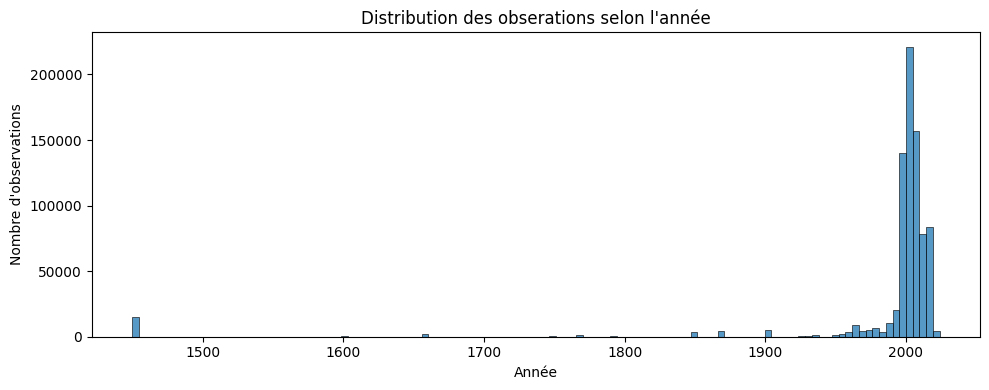

In [9]:
years = df["src_date_dt"].dt.year

plt.figure(figsize=(10,4))
sns.histplot(years.dropna(), bins=120)
plt.title("Distribution des obserations selon l'année")
plt.xlabel("Année")
plt.ylabel("Nombre d'observations")
plt.tight_layout()
plt.show()

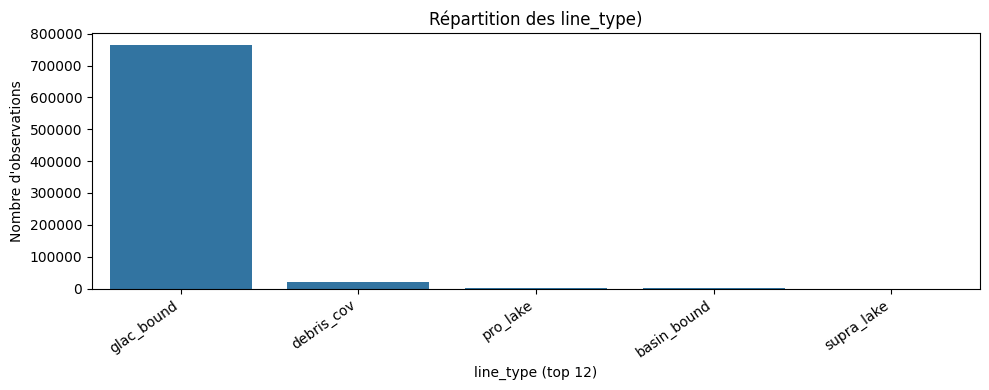

In [10]:
plt.figure(figsize=(10,4))
order = df["line_type"].value_counts().head(10).index  # top 10 si jamais il y en a beaucoup
sns.countplot(data=df, x="line_type", order=order)
plt.title("Répartition des line_type)")
plt.xlabel("line_type (top 12)")
plt.ylabel("Nombre d'observations")
plt.xticks(rotation=35, ha="right")
plt.tight_layout()
plt.show()

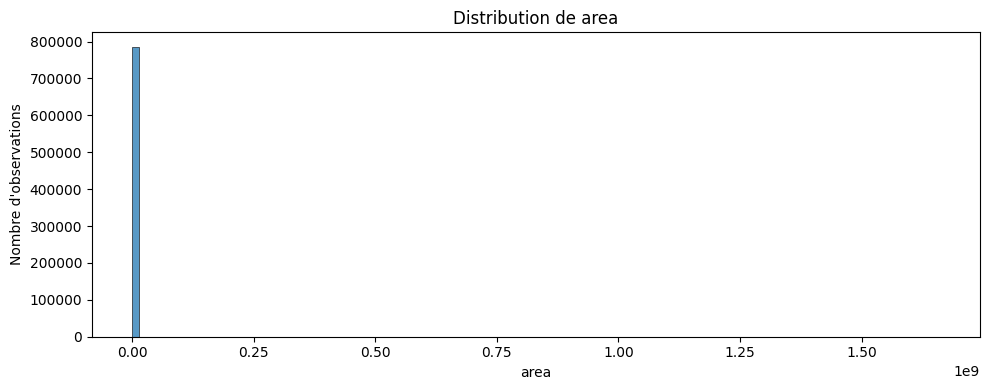

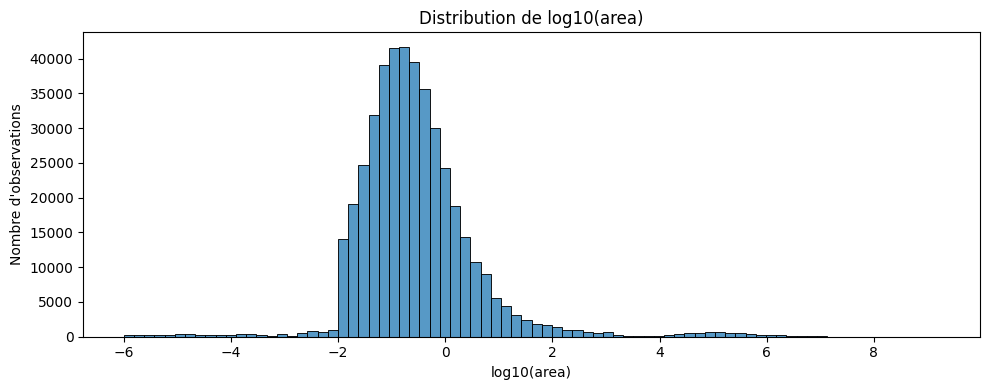

In [11]:
if "area" in df.columns:
    plt.figure(figsize=(10,4))
    sns.histplot(df["area"], bins=120)
    plt.title("Distribution de area")
    plt.xlabel("area")
    plt.ylabel("Nombre d'observations")
    plt.tight_layout()
    plt.show()

    # version log (plus lisible si très skew)
    positive = df["area"].where(df["area"] > 0)
    plt.figure(figsize=(10,4))
    sns.histplot(np.log10(positive.dropna()), bins=80)
    plt.title("Distribution de log10(area)")
    plt.xlabel("log10(area)")
    plt.ylabel("Nombre d'observations")
    plt.tight_layout()
    plt.show()

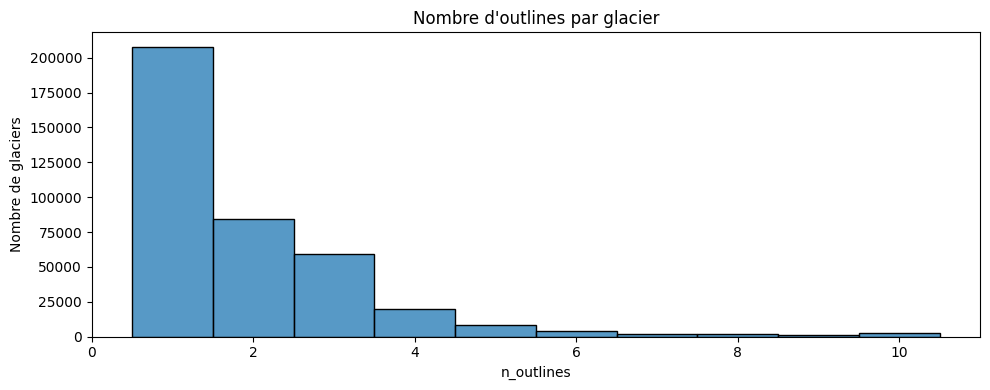

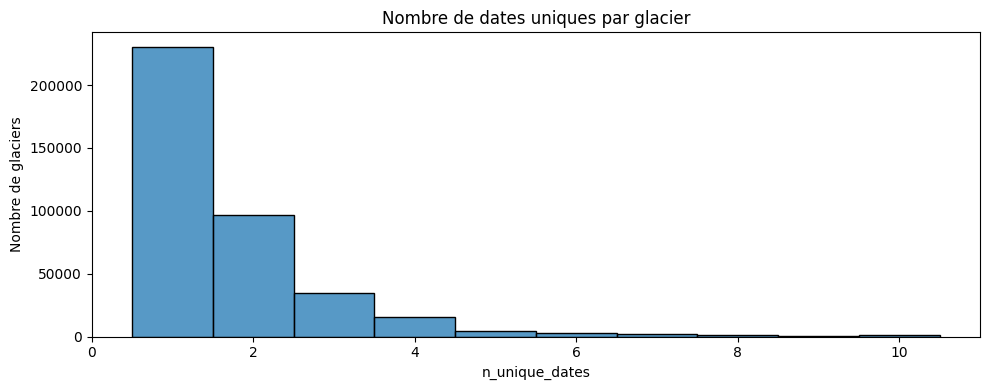

In [12]:
tmp = df.dropna(subset=["glac_id"]).copy()
n_outlines = tmp.groupby("glac_id").size()

tmp2 = tmp.dropna(subset=["src_date_dt"])
n_dates = tmp2.groupby("glac_id")["src_date_dt"].nunique()

cap = 10

plt.figure(figsize=(10,4))
sns.histplot(n_outlines.clip(upper=cap), bins=cap, discrete=True)
plt.title("Nombre d'outlines par glacier")
plt.xlabel("n_outlines")
plt.ylabel("Nombre de glaciers")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(n_dates.clip(upper=cap), bins=cap, discrete=True)
plt.title("Nombre de dates uniques par glacier")
plt.xlabel("n_unique_dates")
plt.ylabel("Nombre de glaciers")
plt.tight_layout()
plt.show()

# Nettoyage du jeu de données
## Une fois téléchargées, elles seront dans /projet_glacier/data/processed/...
Pour voir précisément comment les nettoyage est fait, il est possible de consulter le fichier
src/glacier/data/data_cleaning.py.
Pour faire court, le nettoyage du jeu de données consiste à :
- Conserver uniquement les contours de glaciers pertinents (line_type = "glac_bound").
- Nettoyer les géométries (retirer les géométries vides/nulles, définir le CRS et corriger les géométries invalides) pour fiabiliser les opérations spatiales. (il y en a quasiment aucunes mais juste au cas où)
- Recoder les valeurs sentinelles (p. ex. -9999) des variables d’élévation en valeurs manquantes (NaN) sans supprimer d’observations.
- Supprimer les valeurs non physiques (aire ≤ 0) et les doublons exacts.

Ensuite nous filtrons de façons à garder que ce qui semble exploitable pour pouvoir faire de la prédiction

- Nous filtrons les glaciers disposant d’au moins $k\geq 2$ dates d’observation distinctes afin de disposer d’une information temporelle suffisante
- Convertir src_date en datetime et gérer les valeurs aberrantes; le filtrage temporel (p. ex. ≥1900 ou ≥2015) est appliqué dans une vue dédiée à l’analyse temporelle.

In [13]:
from glacier.data import fetch_data, clean_glims_outlines, make_temporal_view, make_prediction_view

In [14]:
gdf_north = clean_glims_outlines(gdf_raw_north)
gdf_south = clean_glims_outlines(gdf_raw_south)
gdf = gpd.GeoDataFrame(pd.concat([gdf_north, gdf_south], ignore_index=True), crs=gdf_north.crs)


In [15]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

gdf.head()

,line_type,anlys_id,glac_id,anlys_time,area,db_area,width,length,primeclass,min_elev,mean_elev,max_elev,src_date,rec_status,glac_name,wgms_id,local_id,glac_stat,gone_date,gone_dt_e,subm_id,release_dt,proc_desc,rc_id,geog_area,chief_affl,conn_lvl,surge_type,term_type,gtng_o1reg,gtng_o2reg,rgi_gl_typ,parent_id,submitters,analysts,geometry,src_date_dt
0,glac_bound,715234.0,G340953E63564N,1993-09-01 00:00:00+00:00,12.414,12.413600,0.0,0.0,0.0,405.0,0.0,1440.0,1999-09-09T00:00:00,okay,None,None,None,exists,None,0.0,719.0,2014-12-01T11:00:00,Manual glacier digitization from ASTER imagery...,761.0,Randolph Glacier Inventory; Umbrella RC for me...,University of Colorado,0.0,0.0,9.0,6.0,1.0,None,G340925E63656N,"Sigurdsson, Oddur","Sigurdsson, Oddur","POLYGON ((-19.04472 63.58378, -19.04474 63.583...",1999-09-09 00:00:00+00:00
1,glac_bound,409177.0,G222822E58665N,2015-07-16 00:00:00+00:00,0.777,0.776922,0.0,0.0,0.0,2496.0,0.0,3879.0,2010-09-15T00:00:00,okay,None,None,None,exists,None,0.0,624.0,2015-07-16T00:00:00,Semi-automated glacier classification.; From R...,761.0,Randolph Glacier Inventory; Umbrella RC for me...,University of Colorado,0.0,1.0,9.0,1.0,6.0,19,G222793E58546N,"Cogley, Graham","Beedle, Matthew; Berthier, Etienne; Bolch, Tob...","POLYGON ((-137.17153 58.66963, -137.17016 58.6...",2010-09-15 00:00:00+00:00
2,glac_bound,405377.0,G217968E60885N,2015-07-16 00:00:00+00:00,8.838,8.837740,0.0,0.0,0.0,1560.0,0.0,2410.0,2010-09-12T00:00:00,okay,None,None,None,exists,None,0.0,624.0,2015-07-16T00:00:00,Semi-automated glacier classification.; From R...,761.0,Randolph Glacier Inventory; Umbrella RC for me...,University of Colorado,0.0,0.0,9.0,1.0,5.0,99,None,"Cogley, Graham","Beedle, Matthew; Berthier, Etienne; Bolch, Tob...","POLYGON ((-141.99826 60.87683, -141.99836 60.8...",2010-09-12 00:00:00+00:00
3,glac_bound,401811.0,G214518E60704N,2015-07-16 00:00:00+00:00,0.258,0.258463,0.0,0.0,0.0,600.0,0.0,1147.0,2010-09-02T00:00:00,okay,None,None,None,exists,None,0.0,624.0,2015-07-16T00:00:00,Semi-automated glacier classification.; From R...,761.0,Randolph Glacier Inventory; Umbrella RC for me...,University of Colorado,0.0,0.0,9.0,1.0,4.0,99,None,"Cogley, Graham","Beedle, Matthew; Berthier, Etienne; Bolch, Tob...","POLYGON ((-145.47844 60.70451, -145.47778 60.7...",2010-09-02 00:00:00+00:00
4,glac_bound,414761.0,G227911E56819N,2015-07-16 00:00:00+00:00,0.260,0.260388,0.0,0.0,0.0,1203.0,0.0,1399.0,2004-08-10T00:00:00,okay,None,None,None,exists,None,0.0,624.0,2015-07-16T00:00:00,Semi-automated glacier classification.; From R...,761.0,Randolph Glacier Inventory; Umbrella RC for me...,University of Colorado,0.0,0.0,9.0,1.0,6.0,99,None,"Cogley, Graham","Beedle, Matthew; Berthier, Etienne; Bolch, Tob...","POLYGON ((-132.08464 56.82164, -132.0858 56.81...",2004-08-10 00:00:00+00:00


In [19]:
print("raw north:", len(gdf_raw_north), "-> clean:", len(gdf_north)) 
print("raw south:", len(gdf_raw_south), "-> clean:", len(gdf_south))
print("total clean:", len(gdf))
gdf.info()

raw north: 616791 -> clean: 293728
raw south: 169129 -> clean: 107152
total clean: 400880
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 400880 entries, 0 to 400879
Data columns (total 37 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   line_type    400880 non-null  str                
 1   anlys_id     400880 non-null  float64            
 2   glac_id      400880 non-null  str                
 3   anlys_time   400880 non-null  datetime64[us, UTC]
 4   area         400880 non-null  float64            
 5   db_area      400880 non-null  float64            
 6   width        400880 non-null  float64            
 7   length       400880 non-null  float64            
 8   primeclass   400880 non-null  float64            
 9   min_elev     400749 non-null  float64            
 10  mean_elev    400741 non-null  float64            
 11  max_elev     400749 non-null  float64            
 12  src_date     400

In [22]:
gdf[["min_elev","mean_elev","max_elev"]].describe()

,min_elev,mean_elev,max_elev
count,400749.000000,400741.000000,400749.000000
mean,2125.146985,918.412471,2410.393269
std,2095.087216,1707.332512,2213.204632
min,-66.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1347.000000,0.000000,1746.000000
75%,4289.000000,1110.000000,4681.000000
max,8047.000000,8115.000000,65535.000000


### Maintenant filtrons pour des données qui seraient exploitable dans le cadre de prédiction que l'on souhaite entreprendre.
#### On fait une distinction entre temporal et temporal_s2, s2 est pour indiquer que ce sont toute les données depuis le début des images de Sentinel 2.
#### Nous pensons utiliser temporal_s2 pour faire des paires images, satelittes et temporal pour extraires des caractéristiques intéressantes avec les tendances passée du glacier.

In [27]:

temporal = make_temporal_view(gdf, min_date="1900-01-01")
pred = make_prediction_view(gdf, k=3, min_date="1900-01-01",max_date="2026-12-31")

temporal_s2 = temporal[temporal["src_date_dt"] >= pd.Timestamp("2015-06-01", tz="UTC")].copy()
pred_s2 = make_prediction_view(gdf, k=2, min_date="2015-06-01", max_date="2026-12-31") # ici k = 2 parce que 2015 c'est récent, aucun glaciers avec > 3 observations

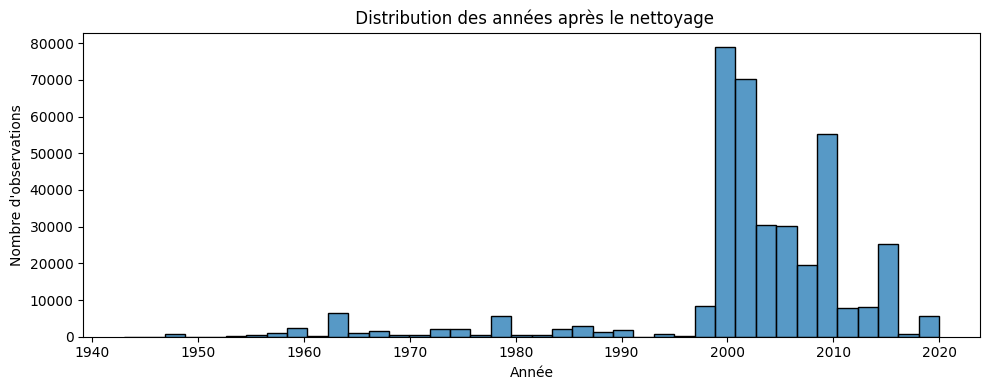

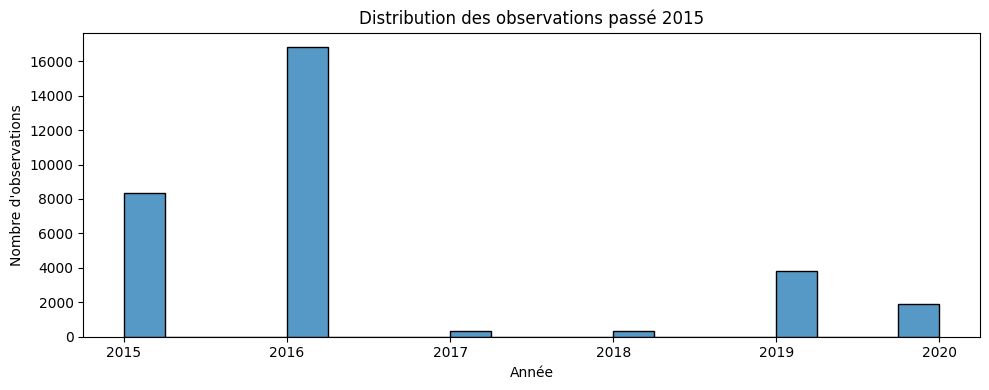

In [29]:
filtered_year = temporal["src_date_dt"].dt.year
year_s2 = temporal_s2["src_date_dt"].dt.year

plt.figure(figsize=(10,4))
sns.histplot(filtered_year.dropna(), bins=40)
plt.title(" Distribution des années après le nettoyage")
plt.xlabel("Année"); plt.ylabel("Nombre d'observations")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(year_s2.dropna(), bins=20)
plt.title("Distribution des observations passé 2015")
plt.xlabel("Année"); plt.ylabel("Nombre d'observations")
plt.tight_layout()
plt.show()

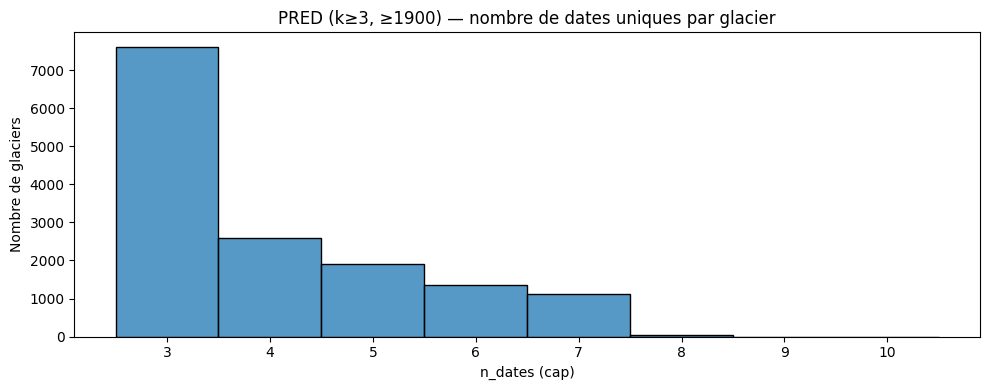

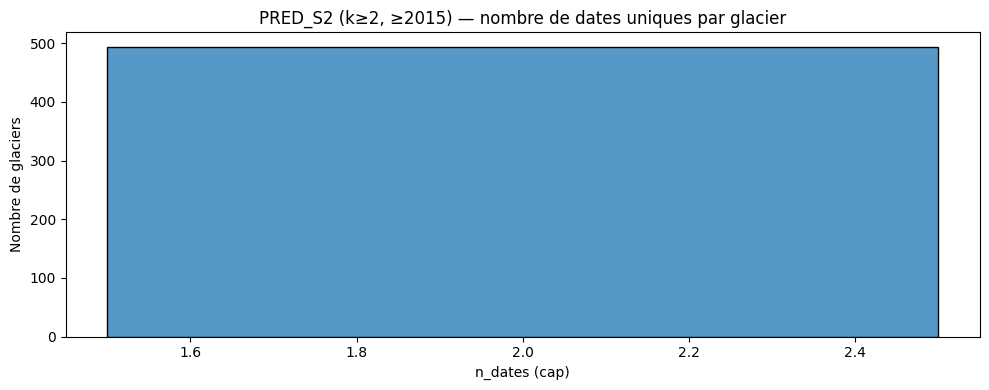

In [32]:
cap = 10

n_dates_temporal = temporal.groupby("glac_id")["src_date_dt"].nunique()
n_dates_pred = pred.groupby("glac_id")["src_date_dt"].nunique()

n_dates_temporal_s2 = temporal_s2.groupby("glac_id")["src_date_dt"].nunique()
n_dates_pred_s2 = pred_s2.groupby("glac_id")["src_date_dt"].nunique()


plt.figure(figsize=(10,4))
sns.histplot(n_dates_pred.clip(upper=cap), bins=cap, discrete=True)
plt.title("PRED (k≥3, ≥1900) — nombre de dates uniques par glacier")
plt.xlabel("n_dates (cap)"); plt.ylabel("Nombre de glaciers")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(n_dates_pred_s2.clip(upper=6), bins=6, discrete=True)
plt.title("PRED_S2 (k≥2, ≥2015) — nombre de dates uniques par glacier")
plt.xlabel("n_dates (cap)"); plt.ylabel("Nombre de glaciers")
plt.tight_layout()
plt.show()


In [ ]:
root = repo_root()
proc = root / "data" / "processed"
proc.mkdir(parents=True, exist_ok=True)

(gdf).to_parquet(proc / "glims_base.parquet")
(pred).to_parquet(proc / "glims_pred_1900.parquet")
(pred_s2).to_parquet(proc / "glims_pred_s2.parquet")

### pour recuperer les jeu de données dans les prochains notebook sans tout rerun on fait 
# gdf = gpd.read_parquet(proc / "glims_base.parquet")
# pred = gpd.read_parquet(proc / "glims_pred_1900.parquet")
# pred_s2 = gpd.read_parquet(proc / "glims_pred_s2.parquet")